In [1]:
import duckdb
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from lib import search_df

/home/seth/src/ucsb-writing-data/.venv/lib64/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [6]:
# embeddings_file = 'outputs/mxbai_embeddings.parquet'
# embeddings_df = duckdb.execute(f"select * from read_parquet('{embeddings_file}') ").fetch_df()
# df = pd.merge(left=embeddings_df, right=responses_df, left_on="student_id", right_on="perm")

responses_file = "data/reflections.csv"
responses_df = pd.read_csv(responses_file)

df = search_df("high school teachers", responses_df, limit=0)

# filter (optional)
# df = df[df.first_gen_coll_student == 1]

In [7]:
# this will take some time
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(np.array(df.embedding.to_list()))

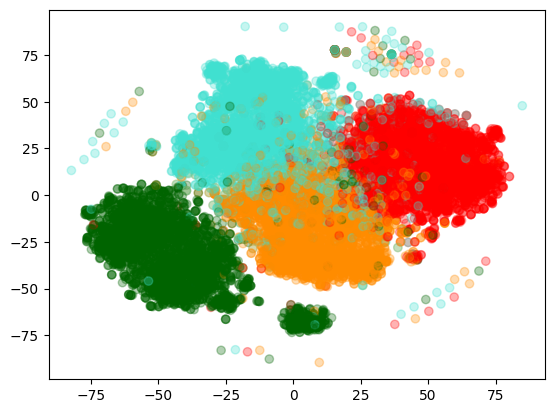

In [8]:
questions = ['r1','r2','r3','r4']
colors = ["red", "darkorange", "turquoise", "darkgreen"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
color_indices = df.result_question_id.apply(lambda v: questions.index(v))
colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)